# Biodiversity

This project pretends to interpret data from the National Parks Service about endangered species in different parks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
scientific_name    23296 non-null object
park_name          23296 non-null object
observations       23296 non-null int64
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [7]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
category               5824 non-null object
scientific_name        5824 non-null object
common_names           5824 non-null object
conservation_status    191 non-null object
dtypes: object(4)
memory usage: 182.1+ KB


In [17]:
df = pd.merge(observations, species, how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
scientific_name        25632 non-null object
park_name              25632 non-null object
observations           25632 non-null int64
category               25632 non-null object
common_names           25632 non-null object
conservation_status    880 non-null object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [21]:
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


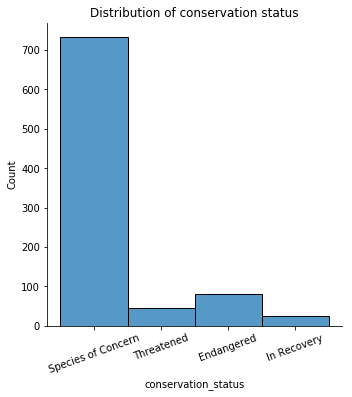

In [16]:
sns.displot(df.conservation_status)
plt.xticks(rotation=20)
plt.title('Distribution of conservation status')
plt.show()

Most of the species are species of concern. Let's see observations of each category.

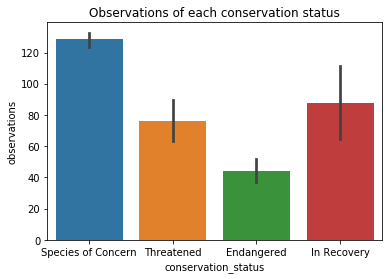

In [26]:
sns.barplot(data=df, x='conservation_status', y='observations')
plt.title('Observations of each conservation status')
plt.show()

There are less observations of endangered species than threatened, as well threatened are less than in recovery. 

Let's focus on endangered species. The next data frame show common names of endangered species.

In [20]:
endangered_species = df[df.conservation_status=='Endangered'].common_names.unique()
endangered_species = pd.DataFrame({'endangered_species': endangered_species})
print(endangered_species)

                                   endangered_species
0                             Red-Cockaded Woodpecker
1                    Sierra Nevada Yellow-Legged Frog
2                                            Red Wolf
3                                    Duskytail Darter
4                                           Gray Wolf
5                                     Gray Wolf, Wolf
6                                         Gray Myotis
7                     Mountain Avens, Spreading Avens
8                                         June Sucker
9                                        Smoky Madtom
10          Bachman's Warbler, Bachman's Wood Warbler
11                        Sierra Nevada Bighorn Sheep
12                                  California Condor
13  Carolina Northern Flying Squirrel, Northern Fl...
14              Indiana Bat, Indiana Or Social Myotis
15                                     Whooping Crane


In [29]:
endangered_species = df[df.conservation_status=='Endangered']
print(endangered_species.head())

        scientific_name                            park_name  observations  \
1400  Picoides borealis               Yosemite National Park            43   
1401  Picoides borealis  Great Smoky Mountains National Park            15   
1402  Picoides borealis            Yellowstone National Park            64   
1403  Picoides borealis                  Bryce National Park            24   
2476       Rana sierrae               Yosemite National Park            42   

       category                      common_names conservation_status  
1400       Bird           Red-Cockaded Woodpecker          Endangered  
1401       Bird           Red-Cockaded Woodpecker          Endangered  
1402       Bird           Red-Cockaded Woodpecker          Endangered  
1403       Bird           Red-Cockaded Woodpecker          Endangered  
2476  Amphibian  Sierra Nevada Yellow-Legged Frog          Endangered  


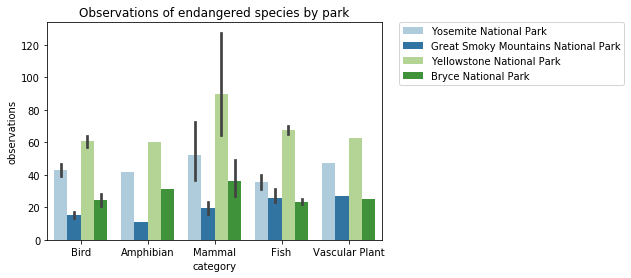

In [41]:
sns.set_palette('Paired')
sns.barplot(data=endangered_species, x='category', y='observations', hue='park_name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Observations of endangered species by park')
plt.show()

We note that most of the endangered species are mammals from Yellowstone National Park. 